***PhiUSIIL_Phishing_URL_Prediction***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
#load data
df=pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')


In [5]:
#first 5 rows
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
#last 5 rows
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [7]:
#total no of values in dataset
df.size

13204520

In [8]:
#tuple of rows and column
df.shape

(235795, 56)

In [9]:
#list of all columns
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [10]:
#data type pf each columns
df.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [11]:
#information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [12]:
#Statistical details of columns
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [13]:
#details of object type columns
df.describe(include=['object'])

,FILENAME,URL,Domain,TLD,Title
count,235795,235795,235795,235795,235795
unique,235795,235370,220086,695,197874
top,521848.txt,https://disclosepack.myportfolio.com/,ipfs.io,com,0
freq,1,2,1197,112554,32719


In [14]:
#checking duplicated and removing it
df.duplicated().sum()
df.drop_duplicates()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [15]:
#finding any nyll values in dataset
df.isnull().any()

FILENAME                      False
URL                           False
URLLength                     False
Domain                        False
DomainLength                  False
IsDomainIP                    False
TLD                           False
URLSimilarityIndex            False
CharContinuationRate          False
TLDLegitimateProb             False
URLCharProb                   False
TLDLength                     False
NoOfSubDomain                 False
HasObfuscation                False
NoOfObfuscatedChar            False
ObfuscationRatio              False
NoOfLettersInURL              False
LetterRatioInURL              False
NoOfDegitsInURL               False
DegitRatioInURL               False
NoOfEqualsInURL               False
NoOfQMarkInURL                False
NoOfAmpersandInURL            False
NoOfOtherSpecialCharsInURL    False
SpacialCharRatioInURL         False
IsHTTPS                       False
LineOfCode                    False
LargestLineLength           

In [16]:
#number of sum of null values in each columns  
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

 Visualizations

Univariate Visualization

Phishing vs Legitimate Websites

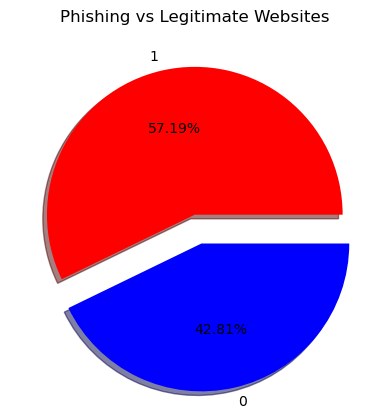

In [20]:
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index, colors=['red', 'blue'], autopct='%1.2f%%', shadow=True,explode=(0,0.2))
plt.title("Phishing vs Legitimate Websites")
plt.show()

CONCLUSION:most of the website are true websites (Legitimate Websites=1(57.19%),phishing websites =0(42.81%) of the data)

Count of Phishing vs Legitimate Websites

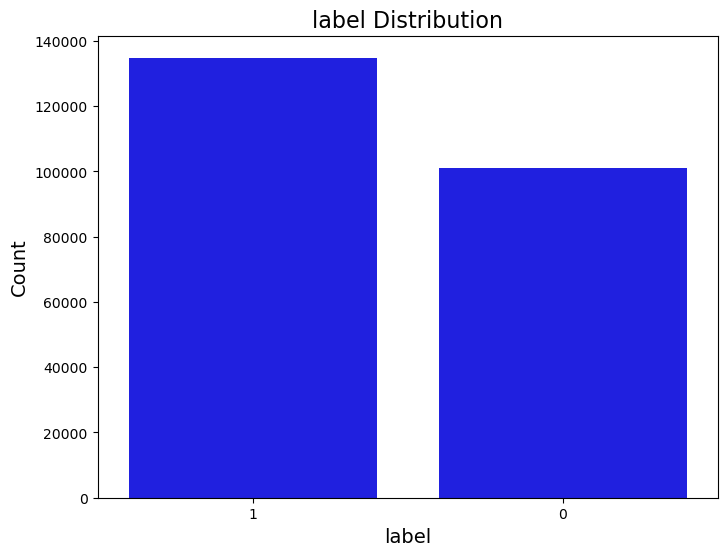

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='label',data=df,color='blue',order=df['label'].value_counts().index)
plt.xlabel('label', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('label Distribution', fontsize=16)
plt.show()

CONCLUSION:Count of phishing is 100000 and legitimate is near to 140000

ULSimilarity index and label relationship


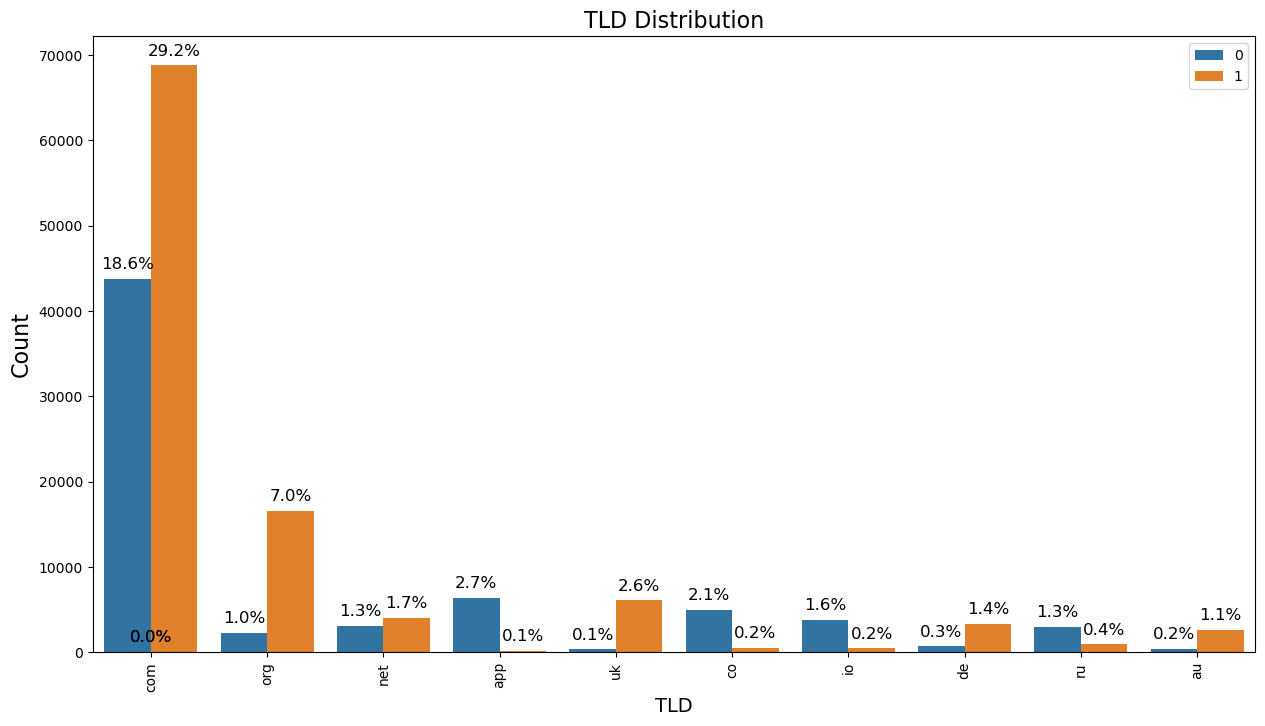

In [26]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='TLD', data=df, order=df['TLD'].value_counts().head(10).index,hue='label')

# Calculate total counts for percentage calculation
total_counts = len(df)

# Add percentage labels
for p in ax.patches:
    height = p.get_height()  # Get bar height
    percentage = f'{100 * height / total_counts:.1f}%'  # Compute percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


plt.xticks(rotation=90)
plt.xlabel('TLD', fontsize=14)
plt.ylabel('Count', fontsize=16)
plt.title('TLD Distribution', fontsize=16)
plt.legend()
plt.show()

CONCLUSION:most of the phishing website is with .com as TLD (18.6% of physhing websites)

Multivariate Visualizatrion

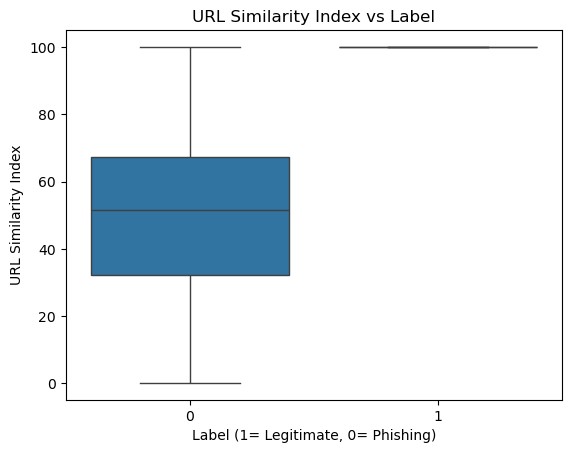

In [29]:

sns.boxplot(x='label', y='URLSimilarityIndex', data=df)
plt.title('URL Similarity Index vs Label')
plt.xlabel('Label (1= Legitimate, 0= Phishing)')
plt.ylabel('URL Similarity Index')
plt.show()

CONCLUSION:Phishing websites having url similarity index ranging from 0 to 100(having different quartiles and min and max ),but in the case of legitimate the index is at 100 itself and there is no any long ranges 
the max and min and quartiles and median almost same

NoOfSelfRef vs Label

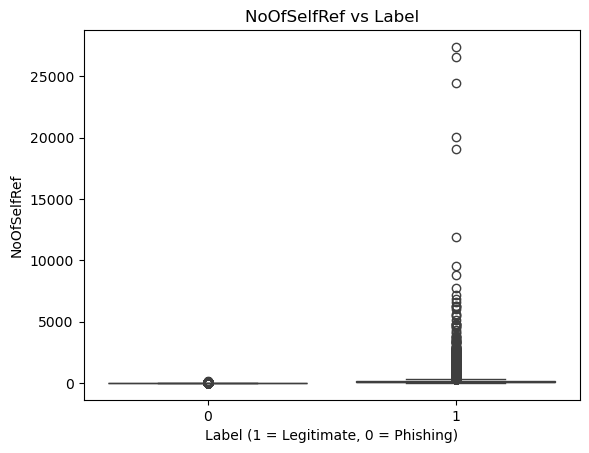

In [32]:
sns.boxplot(x='label', y='NoOfSelfRef', data=df)
plt.title('NoOfSelfRef vs Label')
plt.xlabel('Label (1 = Legitimate, 0 = Phishing)')
plt.ylabel('NoOfSelfRef')
plt.show()

CONCLUSION: Legitimate having large number of self references and having outlier,so the self references indicate legitimate websites

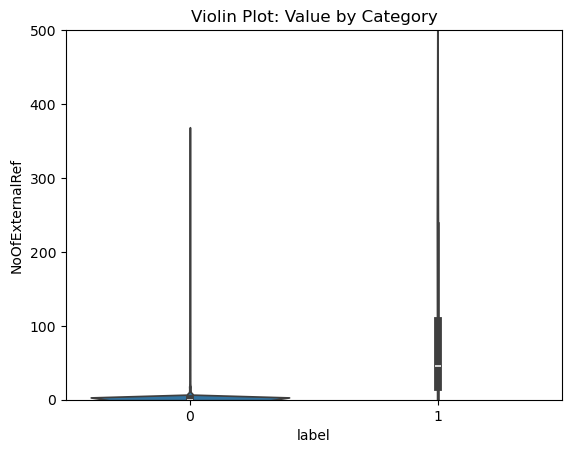

In [34]:
sns.violinplot(x='label', y='NoOfExternalRef', data=df)
plt.ylim(0, 500)
plt.title('Violin Plot: Value by Category')
plt.show()


conclusion:In the case of NoOfExternalRef ,legitimate havinh a wide range .which indicates having large number of NoOfExternalRef is in legitimate

TLD distribution

In [37]:
#checking TLD 
df.groupby('label')['TLD'].unique().tolist()

[array(['com', 'ru', 'gq', 'de', 'app', 'io', 'club', 'today', 'cloud',
        'org', 'xyz', 'co', 'dev', 'ga', 'ws', '123', 'cf', 'me', 'life',
        'net', 'site', 'shop', 'top', 'info', 'br', 'cc', 'tv', 'lt',
        'online', 'id', 'review', 'bar', 'link', 'one', '94', 'live', 'cn',
        'gd', 'it', 'uk', 'win', 'su', 'es', 'cz', 'biz', 'in', 'store',
        'page', 'se', 'il', 'sh', 'quest', 'fr', 'us', 'tk', 'vip',
        'agency', 'cyou', 'kz', '128', 'ml', 'az', 'at', 'download', 'ua',
        'finance', 'ug', 'cool', 'sg', 'ar', 'nz', 'eu', 'gr', 'moe',
        'icu', '103', 'fun', '130', 'cm', 'xn--c1avg', 'vg', 'be', 'ir',
        'je', 'pk', 'nl', 'za', 'st', 'ro', 'ly', 'bid', 'bio', 'pl', 'jp',
        'world', 'law', 'digital', 'mx', 'au', 'ng', 'hu', 'email', 'hn',
        'blog', 'stream', 'ca', 'ht', 'lc', 'tr', 'website', 'im', 'cl',
        'th', 'gp', 'ch', 'hk', 'no', 'asia', 'kw', 'sv', 'cat', 'to',
        'vn', 'art', 'cfd', 'pt', 'bo', 'mobi', 'pw', '

relplot with URLLength, CharCount, Label

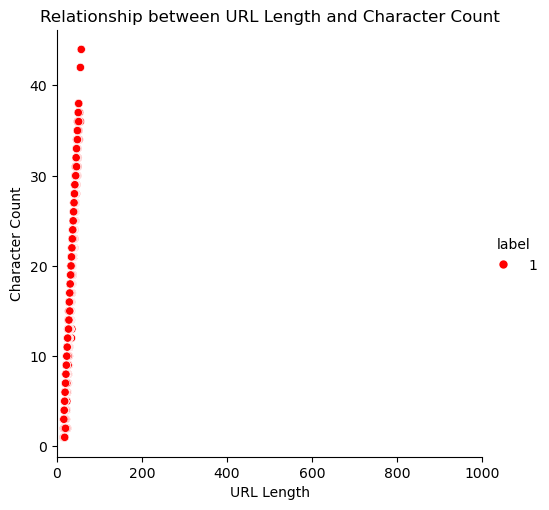

In [39]:
relevant_columns = df[df['label'] == 1][['URLLength', 'NoOfLettersInURL', 'label']]
relevant_columns1 = df[df['label'] == 0][['URLLength', 'NoOfLettersInURL', 'label']]
#relevant_columns=df.groupby(df['label']==1)[['URLLength', 'NoOfLettersInURL', 'label']]
#relevant_columns = df[['URLLength', 'NoOfLettersInURL', 'label']]
sns.relplot(data=relevant_columns, x='URLLength', y='NoOfLettersInURL', hue='label', style='label',palette={0: 'blue', 1: 'red'})
#sns.relplot(data=relevant_columns1, x='URLLength', y='NoOfLettersInURL', hue='label', style='label',palette={0: 'blue', 1: 'red'})
plt.xlim(0,1000)
plt.title('Relationship between URL Length and Character Count')
plt.xlabel('URL Length')
plt.ylabel('Character Count')

plt.show()

line plot of urllength and label

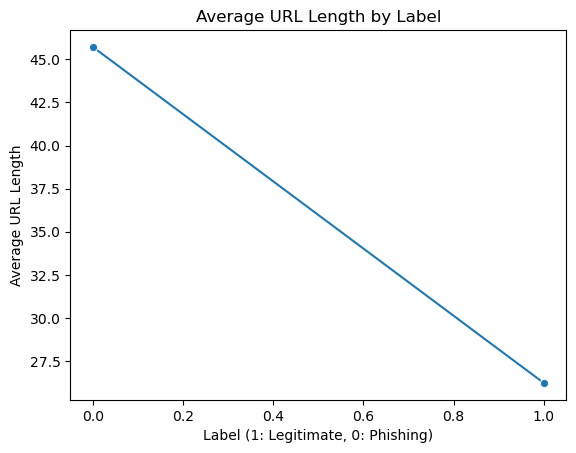

In [41]:
# Calculate the average URL length for each label
average_length = df.groupby('label')['URLLength'].mean().reset_index()
average_length.columns = ['label', 'average_length']

# Create a line plot
sns.lineplot(data=average_length, x='label', y='average_length', marker='o')

# Add titles and labels
plt.title('Average URL Length by Label')
plt.xlabel('Label (1: Legitimate, 0: Phishing)')
plt.ylabel('Average URL Length')

# Show the plot
plt.show()

Scatter plot of url length vs number of letters in url

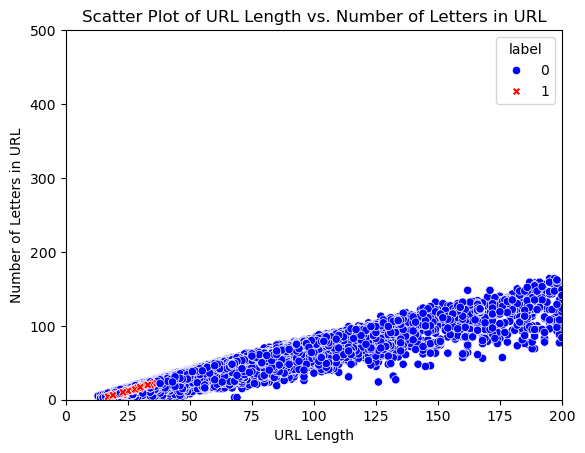

In [43]:
sns.scatterplot(data=df, x='URLLength', y='NoOfLettersInURL', hue='label', style='label', palette={0: 'blue', 1: 'red'})

# Add titles and labels
plt.title('Scatter Plot of URL Length vs. Number of Letters in URL')
plt.xlabel('URL Length')
plt.ylabel('Number of Letters in URL')

# Show the plot
plt.xlim(0, 200)  # Adjust x-axis limits as needed
plt.ylim(0, 500)
#plt.ylim(0, df['NoOfLettersInURL'].max() + 10)  # Adjust y-axis limits as needed
plt.show()

Number of digits in url vs target

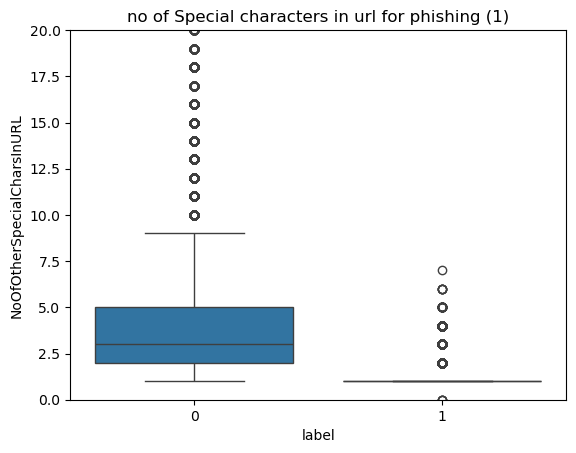

In [45]:
sns.boxplot(data=df,y="NoOfOtherSpecialCharsInURL",x="label")
plt.title("no of Special characters in url for phishing (1)")
plt.ylim(0,20)
plt.show()

Number of characters in url vs target

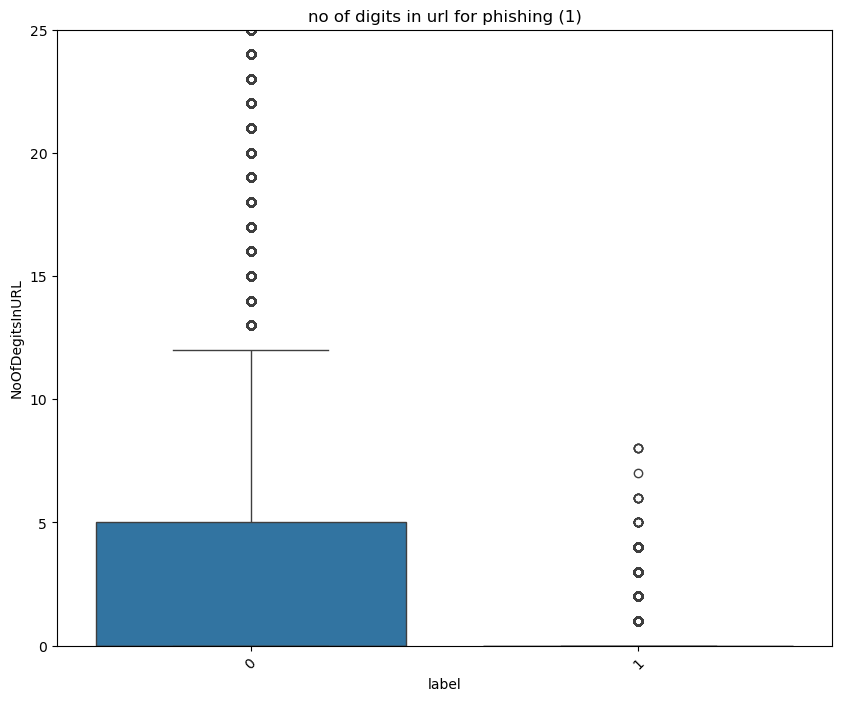

In [47]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,y="NoOfDegitsInURL",x="label")
plt.xticks(rotation=45)
plt.ylim(0, 25)
plt.title("no of digits in url for phishing (1)")
plt.show()

Length of url vs target

Text(0.5, 1.0, 'length of url vs target')

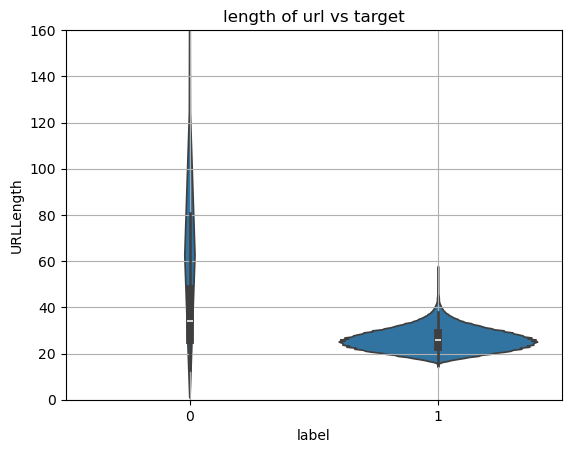

In [49]:
#plt.figure(figsize=(10,8),dpi=100)
sns.violinplot(data=df,x="label",y='URLLength')
plt.ylim(0, 160)
plt.grid()
plt.title("length of url vs target")

Outliers handling

In [51]:
def outliers(df1, feature):
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df1[feature] < lower_bound) | (df1[feature] > upper_bound)
    outlier_values = df1[feature][outlier_mask]
    
    print(f"Feature: {feature}")
    print("Outlier Count:", outlier_mask.sum())
    print("Outlier Values:\n", outlier_values)
    print("-" * 40)

# Apply to all numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_cols:
    outliers(df, feature)

Feature: URLLength
Outlier Count: 22493
Outlier Values:
 31         91
45        140
77         92
83         51
91         64
         ... 
235747     99
235748    123
235768     52
235782     51
235793     55
Name: URLLength, Length: 22493, dtype: int64
----------------------------------------
Feature: DomainLength
Outlier Count: 13474
Outlier Values:
 83        45
92        47
100       46
104       37
108       39
          ..
235644    44
235648    39
235668    47
235738    38
235793    47
Name: DomainLength, Length: 13474, dtype: int64
----------------------------------------
Feature: IsDomainIP
Outlier Count: 638
Outlier Values:
 125       1
401       1
1205      1
1362      1
2481      1
         ..
230582    1
233569    1
233640    1
233868    1
233955    1
Name: IsDomainIP, Length: 638, dtype: int64
----------------------------------------
Feature: URLSimilarityIndex
Outlier Count: 0
Outlier Values:
 Series([], Name: URLSimilarityIndex, dtype: float64)
-----------------------

In [52]:

def caping_outliers(df1, feature):
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1[feature] = np.where(df1[feature] < lower_bound, lower_bound,
                            np.where(df1[feature] > upper_bound, upper_bound, df1[feature]))
    
    return df1

# Apply to all numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_cols:
    df = caping_outliers(df, feature)

#Optional: Preview results
print(df[numerical_cols].head())
#print("after treating",df)

    

   URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
0       31.0          24.0         0.0               100.0   
1       23.0          16.0         0.0               100.0   
2       29.0          22.0         0.0               100.0   
3       26.0          19.0         0.0               100.0   
4       33.0          26.0         0.0               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           0.522907     0.061933        3.0   
1              0.666667           0.032650     0.050207        2.0   
2              0.866667           0.028555     0.064129        2.0   
3              1.000000           0.522907     0.057606        3.0   
4              1.000000           0.079963     0.059441        3.0   

   NoOfSubDomain  HasObfuscation  ...  Pay  Crypto  HasCopyrightInfo  \
0            1.0             0.0  ...  0.0     0.0               1.0   
1            1.0             0.0  ...  0.0     0.0            

In [53]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_cols:
    outliers(df, feature)

Feature: URLLength
Outlier Count: 0
Outlier Values:
 Series([], Name: URLLength, dtype: float64)
----------------------------------------
Feature: DomainLength
Outlier Count: 0
Outlier Values:
 Series([], Name: DomainLength, dtype: float64)
----------------------------------------
Feature: IsDomainIP
Outlier Count: 0
Outlier Values:
 Series([], Name: IsDomainIP, dtype: float64)
----------------------------------------
Feature: URLSimilarityIndex
Outlier Count: 0
Outlier Values:
 Series([], Name: URLSimilarityIndex, dtype: float64)
----------------------------------------
Feature: CharContinuationRate
Outlier Count: 0
Outlier Values:
 Series([], Name: CharContinuationRate, dtype: float64)
----------------------------------------
Feature: TLDLegitimateProb
Outlier Count: 0
Outlier Values:
 Series([], Name: TLDLegitimateProb, dtype: float64)
----------------------------------------
Feature: URLCharProb
Outlier Count: 0
Outlier Values:
 Series([], Name: URLCharProb, dtype: float64)
-------

In [54]:
print("after treating",df)

after treating            FILENAME                                                URL  \
0        521848.txt                   https://www.southbankmosaics.com   
1         31372.txt                           https://www.uni-mainz.de   
2        597387.txt                     https://www.voicefmradio.co.uk   
3        554095.txt                        https://www.sfnmjournal.com   
4        151578.txt                 https://www.rewildingargentina.org   
...             ...                                                ...   
235790   660997.txt                     https://www.skincareliving.com   
235791    77185.txt                      https://www.winchester.gov.uk   
235792   622132.txt                    https://www.nononsensedesign.be   
235793  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
235794   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
0            31.0         

In [55]:
df.shape

(235795, 56)

In [56]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [57]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31.0,www.southbankmosaics.com,24.0,0.0,com,100.000000,1.000000,0.522907,...,0.0,0.0,1.0,34.0,20.0,28.0,119.0,0.0,124.0,1.0
1,31372.txt,https://www.uni-mainz.de,23.0,www.uni-mainz.de,16.0,0.0,de,100.000000,0.666667,0.032650,...,0.0,0.0,1.0,50.0,9.0,8.0,39.0,0.0,141.0,1.0
2,597387.txt,https://www.voicefmradio.co.uk,29.0,www.voicefmradio.co.uk,22.0,0.0,uk,100.000000,0.866667,0.028555,...,0.0,0.0,1.0,10.0,2.0,7.0,42.0,2.0,5.0,1.0
3,554095.txt,https://www.sfnmjournal.com,26.0,www.sfnmjournal.com,19.0,0.0,com,100.000000,1.000000,0.522907,...,0.0,0.0,1.0,3.0,20.0,15.0,22.0,1.0,31.0,1.0
4,151578.txt,https://www.rewildingargentina.org,33.0,www.rewildingargentina.org,26.0,0.0,org,100.000000,1.000000,0.079963,...,0.0,0.0,1.0,72.5,15.0,34.0,72.0,1.0,85.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29.0,www.skincareliving.com,22.0,0.0,com,100.000000,1.000000,0.522907,...,0.0,0.0,1.0,51.0,7.0,21.0,187.0,2.0,141.0,1.0
235791,77185.txt,https://www.winchester.gov.uk,28.0,www.winchester.gov.uk,21.0,0.0,uk,100.000000,0.785714,0.028555,...,0.0,0.0,0.0,50.0,1.0,7.0,88.0,0.0,31.0,1.0
235792,622132.txt,https://www.nononsensedesign.be,30.0,www.nononsensedesign.be,23.0,0.0,be,100.000000,1.000000,0.003319,...,0.0,0.0,1.0,27.0,10.0,30.0,58.0,2.0,67.0,1.0
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,50.5,patient-cell-40f5.updatedlogmylogin.workers.dev,36.0,0.0,dev,28.157537,0.465116,0.000961,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


***modeling***

common parts of model building and prediction

In [60]:
# Step 1: Encode categorical columns
def encode_categorical_data(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    label_encoders = {}
    
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    
    return df, label_encoders

df, label_encoders = encode_categorical_data(df)



In [61]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,62810,209013,31.0,187114,24.0,0.0,231,100.000000,1.000000,0.522907,...,0.0,0.0,1.0,34.0,20.0,28.0,119.0,0.0,124.0,1.0
1,30568,223747,23.0,204805,16.0,0.0,254,100.000000,0.666667,0.032650,...,0.0,0.0,1.0,50.0,9.0,8.0,39.0,0.0,141.0,1.0
2,79880,227579,29.0,209611,22.0,0.0,647,100.000000,0.866667,0.028555,...,0.0,0.0,1.0,10.0,2.0,7.0,42.0,2.0,5.0,1.0
3,69962,205082,26.0,182115,19.0,0.0,231,100.000000,1.000000,0.522907,...,0.0,0.0,1.0,3.0,20.0,15.0,22.0,1.0,31.0,1.0
4,11694,198761,33.0,173664,26.0,0.0,503,100.000000,1.000000,0.079963,...,0.0,0.0,1.0,72.5,15.0,34.0,72.0,1.0,85.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,93848,207156,29.0,184798,22.0,0.0,231,100.000000,1.000000,0.522907,...,0.0,0.0,1.0,51.0,7.0,21.0,187.0,2.0,141.0,1.0
235791,113036,230522,28.0,213375,21.0,0.0,647,100.000000,0.785714,0.028555,...,0.0,0.0,0.0,50.0,1.0,7.0,88.0,0.0,31.0,1.0
235792,85824,183327,30.0,154095,23.0,0.0,157,100.000000,1.000000,0.003319,...,0.0,0.0,1.0,27.0,10.0,30.0,58.0,2.0,67.0,1.0
235793,108327,85020,50.5,32135,36.0,0.0,258,28.157537,0.465116,0.000961,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [62]:
label_encoders

{'FILENAME': LabelEncoder(),
 'URL': LabelEncoder(),
 'Domain': LabelEncoder(),
 'TLD': LabelEncoder(),
 'Title': LabelEncoder()}

In [63]:
# Step 2: Separate features and target BEFORE scaling
x = df.drop("label", axis=1)
y = df["label"]

In [64]:
# Step 3: Standardize only the features
def scale_data_standardization(x):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(x)
    scaled_df = pd.DataFrame(scaled_data, columns=x.columns)
    return scaled_df, scaler

x_scaled, scaler = scale_data_standardization(x)



In [65]:
x_scaled

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,-0.809292,1.345636,0.090850,1.260856,0.479801,0.0,-0.611740,0.744382,0.713498,1.043145,...,0.0,0.0,0.0,1.02681,0.670424,2.369243,1.654146,0.950649,-0.618717,1.847013
1,-1.282964,1.562481,-0.767782,1.532772,-0.709480,0.0,-0.452746,0.744382,-0.826571,-0.905197,...,0.0,0.0,0.0,1.02681,1.361002,0.639178,-0.136116,-0.196316,-0.618717,2.202056
2,-0.558514,1.618878,-0.123808,1.606641,0.182481,0.0,2.263969,0.744382,0.097470,-0.921472,...,0.0,0.0,0.0,1.02681,-0.365442,-0.461772,-0.225629,-0.153305,1.421671,-0.638292
3,-0.704221,1.287782,-0.445795,1.184020,-0.263499,0.0,-0.611740,0.744382,0.713498,1.043145,...,0.0,0.0,0.0,1.02681,-0.667569,2.369243,0.490475,-0.440046,0.401477,-0.095284
4,-1.560245,1.194754,0.305508,1.054126,0.777121,0.0,1.268532,0.744382,0.713498,-0.717171,...,0.0,0.0,0.0,1.02681,2.332126,1.582850,2.191224,0.276807,0.401477,1.032501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,-0.353308,1.318306,-0.123808,1.225259,0.182481,0.0,-0.611740,0.744382,0.713498,1.043145,...,0.0,0.0,0.0,1.02681,1.404163,0.324621,1.027554,1.925570,1.421671,2.202056
235791,-0.071414,1.662191,-0.231137,1.664495,0.033821,0.0,2.263969,0.744382,-0.276547,-0.921472,...,0.0,0.0,0.0,-0.97389,1.361002,-0.619050,-0.225629,0.506200,-0.618717,-0.095284
235792,-0.471190,0.967607,-0.016479,0.753345,0.331141,0.0,-1.123284,0.744382,0.713498,-1.021764,...,0.0,0.0,0.0,1.02681,0.368297,0.796457,1.833172,0.076089,1.421671,0.656573
235793,-0.140594,-0.479210,2.183765,-1.121213,2.263721,0.0,-0.425095,-1.734996,-1.757776,-1.031133,...,0.0,0.0,0.0,-0.97389,-0.797052,-0.776329,-0.583682,-0.755461,-0.618717,-0.742716


In [66]:
# Step 4: Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)



1.logistic regression

In [68]:

# Step 5: Train logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
#single value prediction
# Let's pick the first row as an example
sample = df.drop("label", axis=1).iloc[[0]]

# Apply the same scaler used on training data
sample_scaled = scaler.transform(sample)

# Predict using the trained logistic regression model
single_prediction = model.predict(sample_scaled)
single_proba = model.predict_proba(sample_scaled)

print("Predicted label:", single_prediction[0])
print("Prediction probability [Class 0, Class 1]:", single_proba[0])

Predicted label: 1.0
Prediction probability [Class 0, Class 1]: [4.84248628e-07 9.99999516e-01]


In [70]:
# Step 6: Evaluate
L_y_pred = model.predict(x_test)
log_accuracy=accuracy_score(y_test, L_y_pred)
print("Accuracy:", log_accuracy)
print("Classification Report:\n", classification_report(y_test, L_y_pred))

Accuracy: 0.9999363854195381
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20124
         1.0       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



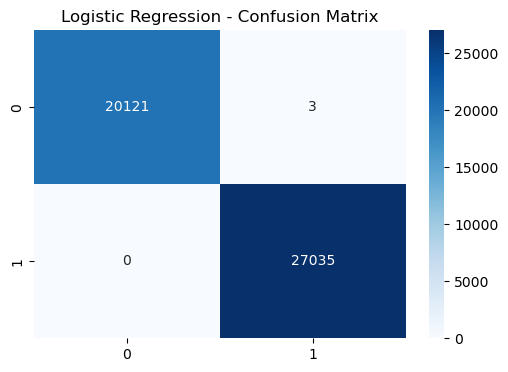

In [71]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, L_y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

2.Random Forest

In [73]:
# Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [74]:
sample = x.iloc[[0]]
sample_scaled = scaler.transform(sample)
single_prediction = rf_model.predict(sample_scaled)
print("Predicted label:", single_prediction[0])

Predicted label: 1.0


In [75]:

# Step 6: Evaluate
R_y_pred = rf_model.predict(x_test)
rand_accuracy=accuracy_score(y_test, R_y_pred)
print("Random Forest Accuracy:",rand_accuracy )
print("Classification Report:\n", classification_report(y_test, R_y_pred))

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20124
         1.0       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



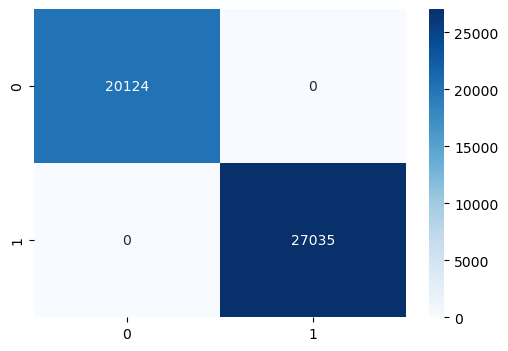

In [76]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,R_y_pred),annot=True, fmt='d', cmap="Blues")
plt.show()

Want to know which features are most important in prediction?

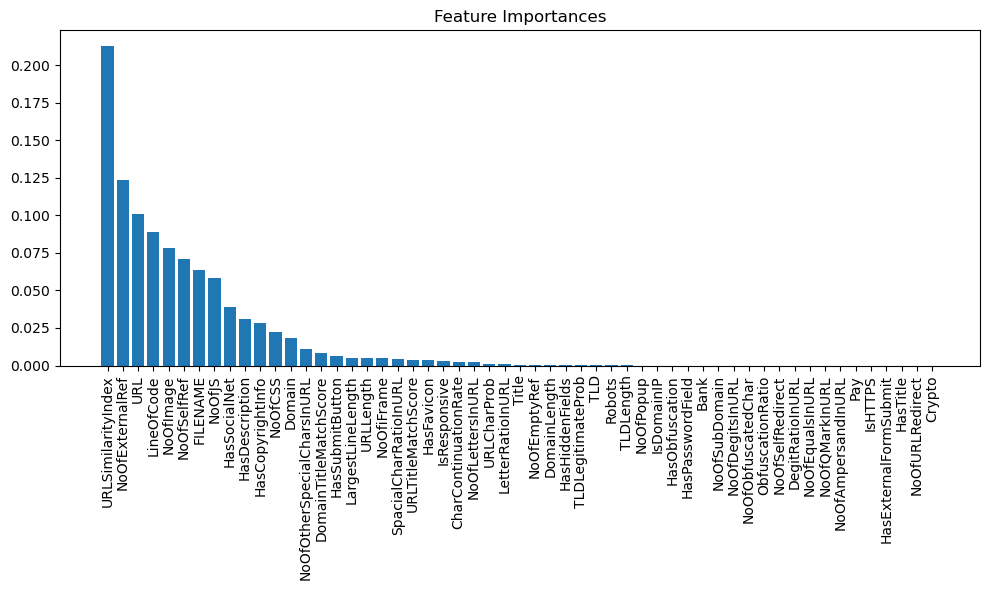

In [78]:
feature_importances = rf_model.feature_importances_
features = x.columns
# Sort and plot
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(features)), feature_importances[indices], align="center")

plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

3.Decision Trees

In [80]:
# Step 5: Train Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [81]:

# Step 6: Evaluation
D_y_pred = dtree.predict(x_test)
dtree_accuracy=accuracy_score(y_test, D_y_pred)
print("Decision Tree Accuracy:", dtree_accuracy)
print("Classification Report:\n", classification_report(y_test, D_y_pred))

Decision Tree Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20124
         1.0       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



Visualizing the Decision Tree to  see the tree logic:

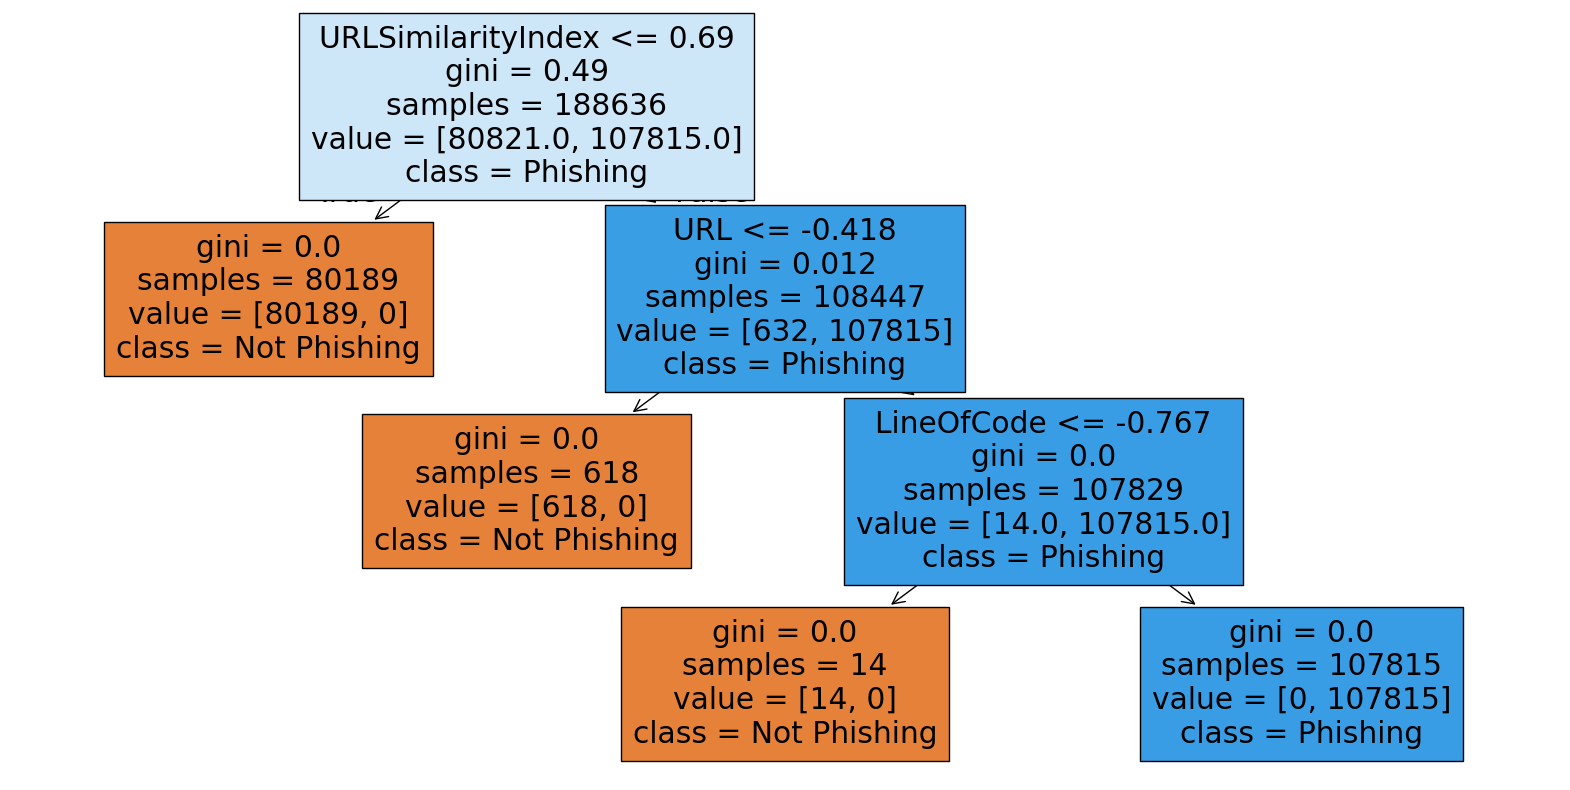

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=x.columns, class_names=["Not Phishing", "Phishing"], filled=True, max_depth=3)
plt.show()

In [84]:
sample = x.iloc[[0]]
sample_scaled = scaler.transform(sample)
single_prediction = dtree.predict(sample_scaled)
print("Predicted label:", single_prediction[0])

Predicted label: 1.0


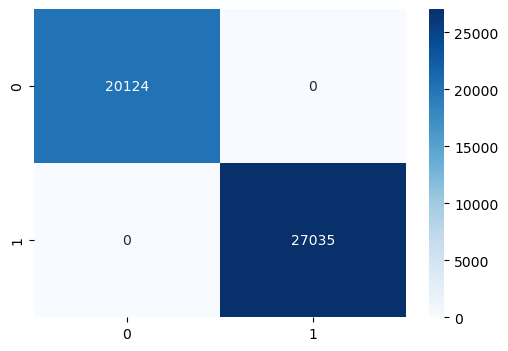

In [85]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,D_y_pred),annot=True, fmt='d', cmap="Blues")
plt.show()

***SVM***

In [87]:
# Step 5: Train SVM Classifier
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [88]:
# Step 6: Evaluate
S_y_pred = svm_model.predict(x_test)
svm_accuracy=accuracy_score(y_test, S_y_pred)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, S_y_pred))

SVM Accuracy: 0.999978795139846
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20124
         1.0       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [89]:
sample = x.iloc[[0]]
sample_scaled = scaler.transform(sample)
single_prediction = svm_model.predict(sample_scaled)
single_proba = svm_model.predict_proba(sample_scaled)

print("Predicted label:", single_prediction[0])
print("Prediction probabilities [Class 0, Class 1]:", single_proba[0])

Predicted label: 1.0
Prediction probabilities [Class 0, Class 1]: [3.0000009e-14 1.0000000e+00]


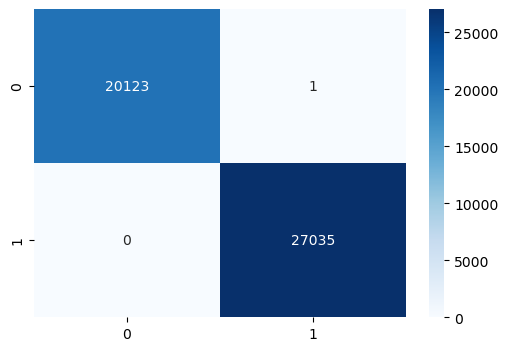

In [90]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,S_y_pred),annot=True, fmt='d', cmap="Blues")
plt.show()

In [91]:
accuracy={
    "Logistic Regression":log_accuracy,
    "Random Forest":rand_accuracy,
    "Decision tree":dtree_accuracy,
    "SVM":svm_accuracy}

In [92]:
max_item = max(accuracy.items(), key=lambda item: item[1])
print(max_item) 

('Random Forest', 1.0)


In [93]:
accuracy

{'Logistic Regression': 0.9999363854195381,
 'Random Forest': 1.0,
 'Decision tree': 1.0,
 'SVM': 0.999978795139846}

***📌 Conclusion***


In this phishing website prediction project, we evaluated the performance of multiple machine learning algorithms using accuracy as the key metric. The models tested include Logistic Regression, Random Forest, Decision Tree, and Support Vector Machine (SVM). The accuracy scores achieved by each model are as follows:

Random Forest: 100%

Decision Tree: 100%

Support Vector Machine (SVM): 99.9979%

Logistic Regression: 99.9936%

All models demonstrated exceptionally high accuracy, indicating that the features used for classification are highly effective in distinguishing between legitimate and phishing websites. Notably, the Random Forest and Decision Tree classifiers achieved perfect accuracy, making them the most promising models for deployment in this context.